In [1]:
#dataset
#A
a = [0, 0, 1, 1, 0, 0,
    0, 1, 0, 0, 1, 0,
    1, 1, 1, 1, 1, 1,
    1, 0, 0, 0, 0, 1,
    1, 0, 0, 0, 0, 1]
#B
b = [0, 1, 1, 1, 1, 0,
    0, 1, 0, 0, 1, 0,
    0, 1, 1, 1, 1, 0,
    0, 1, 0, 0, 1, 0,
    0, 1, 1, 1, 1, 0]
#C
c = [0, 1, 1, 1, 1, 0,
    0, 1, 0, 0, 0, 0,
    0, 1, 0, 0, 0, 0,
    0, 1, 0, 0, 0, 0,
    0, 1, 1, 1, 1, 0]

In [2]:
#creating labels
y = [[1, 0, 0],
     [0, 1, 0],
     [0, 0, 1]]

In [3]:
import numpy as np
import matplotlib.pyplot as plt

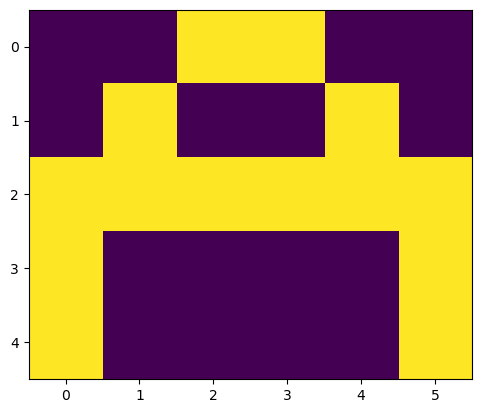

In [4]:
#visualize the data
plt.imshow(np.array(a).reshape(5, 6))
plt.show()

In [5]:
#Convert data and lables into numpy array
x = [np.array(a).reshape(1, 30), np.array(b).reshape(1, 30), np.array(c).reshape(1, 30)]
y = np.array(y)

print(x, "\n\n", y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [6]:
#input layer
#hidden layer
#output layer

In [7]:
#activation function
def sigmoid(x):
    return (1/(1+np.exp(-x)))

In [8]:
#Creating a feed forward netural network
def f_forward(x, w1, w2):
    #hidden layer
    z1 = x.dot(w1)
    a1 = sigmoid(z1)

    #output layer
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    return (a2)

In [9]:
# initialize weights 
def generate_wt(x, y):
    l = []
    for i in range (x*y):
        l.append(np.random.randn())
    return (np.array(l).reshape(x, y))

In [10]:
#loss computation 
def loss(out, y):
    s = (np.square(out-y))
    s = np.sum(s)/len(y)
    return(s)

In [11]:
#back propagation
def back_prop(x, y, w1, w2, alpha):

    #hidden layer
    z1 = x.dot(w1)
    a1 = sigmoid(z1)

    #output layer
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)

    d2 = (a2-y)
    d1_term = (w2.dot(d2.T)).T  # shape: (batch_size, hidden_size)
    d1 = np.multiply(d1_term, a1 * (1 - a1))  # element-wise multiplication

    # Gradient computation
    w1_adj = x.T.dot(d1)
    w2_adj = a1.T.dot(d2)

    w1 = w1 - (alpha*(w1_adj))
    w2 = w2 - (alpha*(w2_adj))

    return (w1,w2)
    

In [12]:
# train the dataset

def train(x, y, w1, w2, alpha= 0.01, epoch= 10):
    acc= []
    losss= []

    for j in range(epoch):
        l= []
        for i in range(len(x)):
            out = f_forward(x[i], w1, w2)
            l.append((loss(out, y[i])))
            w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
        print("Epochs:", j+1, "acc:", (1-sum(l)/len(x))*100)
        acc.append((1-sum(l)/len(x))*100)
        losss.append(sum(l)/len(x))
    return acc, losss, w1, w2

In [13]:
# predicting the values
def predict(x, w1, w2):
    Out = f_forward(x, w1, w2)
    maxm = 0
    k = 0
    for i in range(len(Out[0])): 
        if(maxm < Out[0][i]):
            maxm= Out[0][i]
            k= i
    if(k == 0):
        print("Image is of letter A")
    elif(k == 1):
        print("Image is of letter B")
    else:
        print("Image is of letter C")
    plt.imshow(x.reshape(5, 6))
    plt.show()

In [14]:
w1= generate_wt(30, 5)
w2= generate_wt(5, 3)

print(w1, "\n\n", w2)

[[-0.64293543 -1.74874848  0.76538142  0.282866    0.35977173]
 [-0.3461815  -1.20354217 -1.4489981  -0.53373321 -0.21999034]
 [-0.89331051  0.79954974 -0.5967022  -0.21941662  1.99432712]
 [ 1.49858013 -0.16296417 -1.02653566 -0.52076245 -0.38135549]
 [ 0.38624823  0.32862372  1.913922    0.10502712 -0.63069684]
 [-0.83645002 -0.32217304  0.36257188 -2.48516364  1.42291605]
 [ 1.07973699  0.21521906  0.90576613 -1.574293   -0.58537069]
 [-1.24144484  1.27678775  2.01668118  0.52881756  1.42449315]
 [-1.58186641  0.55790875  1.76865807  0.89155237  1.29657922]
 [ 0.46890092 -1.47100547  0.08673459 -0.87889149 -0.28410187]
 [ 0.27822039 -0.19853505  1.4291114   0.89361768  0.63898206]
 [-0.49224581 -0.14214075  1.56735572  0.48728406  1.32213713]
 [ 0.50442506  0.99885566  0.63548812 -1.22321007 -0.25830729]
 [ 0.30213627 -0.63045461 -0.65145095  0.10555046 -0.55428931]
 [-1.437682   -0.6955703  -0.38108364 -0.81774335 -1.83236241]
 [ 0.38047254  0.08197688  0.13596926 -0.53020472 -0.20

In [15]:
acc, losss, w1, w2 = train(x,y,w1,w2,0.1,100)

Epochs: 1 acc: 72.53722227207126
Epochs: 2 acc: 74.3402769963315
Epochs: 3 acc: 75.8856544315748
Epochs: 4 acc: 77.22816181357973
Epochs: 5 acc: 78.40418189573334
Epochs: 6 acc: 79.43602806628503
Epochs: 7 acc: 80.3398496729372
Epochs: 8 acc: 81.13103231316065
Epochs: 9 acc: 81.8250942623444
Epochs: 10 acc: 82.4364611149996
Epochs: 11 acc: 82.97755673515034
Epochs: 12 acc: 83.45871072098744
Epochs: 13 acc: 83.88845971897072
Epochs: 14 acc: 84.2738920887591
Epochs: 15 acc: 84.62092516017833
Epochs: 16 acc: 84.93451725096195
Epochs: 17 acc: 85.21883623442108
Epochs: 18 acc: 85.47739862098443
Epochs: 19 acc: 85.7131854754816
Epochs: 20 acc: 85.92873832039002
Epochs: 21 acc: 86.12623751974355
Epochs: 22 acc: 86.30756568994528
Epochs: 23 acc: 86.47435868644413
Epochs: 24 acc: 86.62804652596647
Epochs: 25 acc: 86.76988628750725
Epochs: 26 acc: 86.90098867955498
Epochs: 27 acc: 87.02233962447437
Epochs: 28 acc: 87.13481792090312
Epochs: 29 acc: 87.23920980837295
Epochs: 30 acc: 87.33622107162

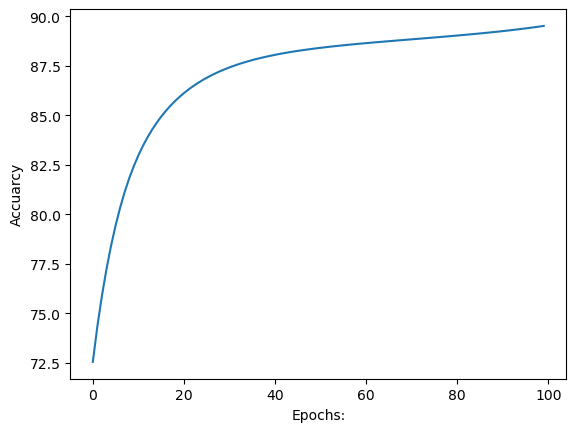

In [16]:
import matplotlib.pyplot as plt1

#plotting accuracy
plt1.plot(acc)
plt.ylabel("Accuarcy")
plt.xlabel("Epochs:")
plt1.show()

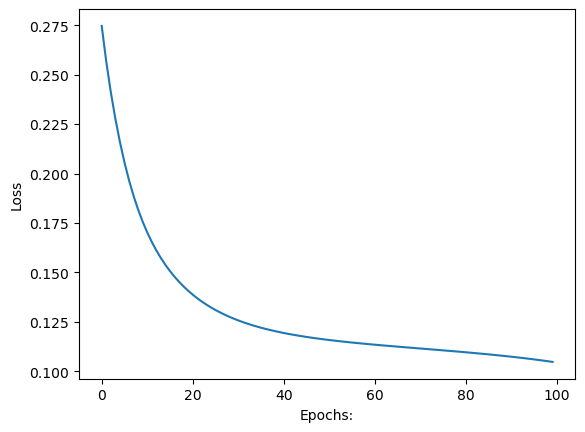

In [17]:
#plot loss
plt1.plot(losss)
plt.ylabel("Loss")
plt.xlabel("Epochs:")
plt1.show()

In [18]:
print(w1, "\n\n", w2)

[[-0.64293543 -1.74874848  0.76538142  0.282866    0.35977173]
 [-0.41278078 -1.21038254 -1.68287075 -0.53099067 -0.05181301]
 [-0.72340291  1.12262632 -0.47520374 -0.17038665  1.82324419]
 [ 1.66848773  0.16011242 -0.90503721 -0.47173248 -0.55243842]
 [ 0.31964894  0.32178335  1.68004935  0.10776966 -0.46251951]
 [-0.83645002 -0.32217304  0.36257188 -2.48516364  1.42291605]
 [ 1.07973699  0.21521906  0.90576613 -1.574293   -0.58537069]
 [-1.07153725  1.59986433  2.13817964  0.57784753  1.25341021]
 [-1.58186641  0.55790875  1.76865807  0.89155237  1.29657922]
 [ 0.46890092 -1.47100547  0.08673459 -0.87889149 -0.28410187]
 [ 0.47881427 -0.05054749  0.98523376  0.93912982  0.48453925]
 [-0.49224581 -0.14214075  1.56735572  0.48728406  1.32213713]
 [ 0.74093194  1.32877262  0.99085923 -1.17692264 -0.59756755]
 [ 0.47204387 -0.30737803 -0.5299525   0.15458042 -0.72537224]
 [-1.23708812 -0.54758274 -0.82496128 -0.77223121 -1.98680522]
 [ 0.58106641  0.22996443 -0.30790838 -0.48469258 -0.36

Image is of letter A


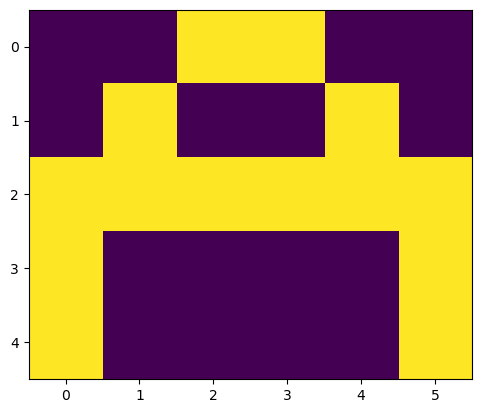

In [19]:
predict(x[0], w1, w2)

Image is of letter B


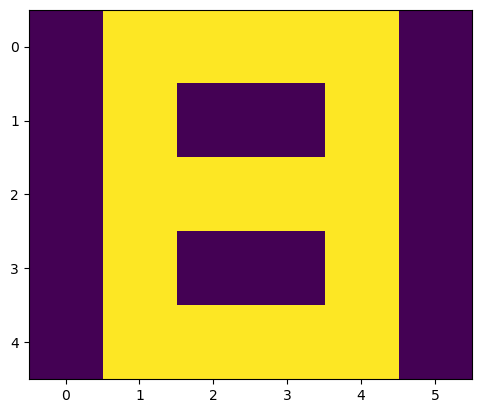

In [20]:
predict(x[1], w1, w2)

Image is of letter C


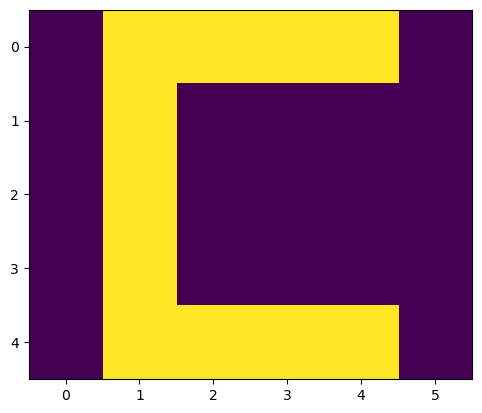

In [21]:
predict(x[2], w1, w2)